# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os  # Penting untuk mencari file di laptop

# Library untuk Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Mengatur tampilan grafik agar rapi
sns.set(style="whitegrid")

# Supaya tidak muncul pesan warning merah yang mengganggu
import warnings
warnings.filterwarnings('ignore')

print("✅ Library berhasil di-import!")

✅ Library berhasil di-import!


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [ ]:
import pandas as pd
import os

#  KONFIGURASI YANG SUDAH DIPERBAIKI 

folder_name = 'LoanPrediction_raw'
file_name = 'train.csv'


file_path = os.path.join('..', folder_name, file_name)

print(f"Mencoba membaca file dari lokasi: {file_path}")

# --- EKSEKUSI MEMUAT DATA ---
if os.path.exists(file_path):
    try:
        df = pd.read_csv(file_path)
        print("\n✅ BERHASIL! Dataset sudah masuk ke variabel 'df'.")
        print(f"Jumlah Baris: {df.shape[0]}, Jumlah Kolom: {df.shape[1]}")
        print("5 Baris Pertama:")
        display(df.head())
    except Exception as e:
        print(f"\n❌ File ketemu tapi error saat dibaca: {e}")
else:
    # Coba cek path alternatif (siapa tahu dijalankan dari folder utama)
    path_alternatif = os.path.join(folder_name, file_name)
    if os.path.exists(path_alternatif):
        df = pd.read_csv(path_alternatif)
        print("\n✅ BERHASIL! (Ditemukan via path alternatif)")
        display(df.head())
    else:
        print("\n❌ GAGAL LAGI. File tidak ditemukan.")
        print(f"Python mencari di: {os.path.abspath(file_path)}")
        print("Pastikan struktur foldermu:")
        print(f"Eksperimen_SML_Rayhan/")
        print(f"├── {folder_name}/  <-- Cek nama folder ini, harus 'LoanPrediction_raw'")
        print(f"│   └── train.csv")
        print(f"└── preprocessing/")
        print(f"    └── (Notebook ini)")

Mencoba membaca file dari lokasi: ..\LoanPrediction_raw\train.csv

✅ BERHASIL! Dataset sudah masuk ke variabel 'df'.
Jumlah Baris: 614, Jumlah Kolom: 13
5 Baris Pertama:


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

Jumlah Missing Values per Kolom:
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


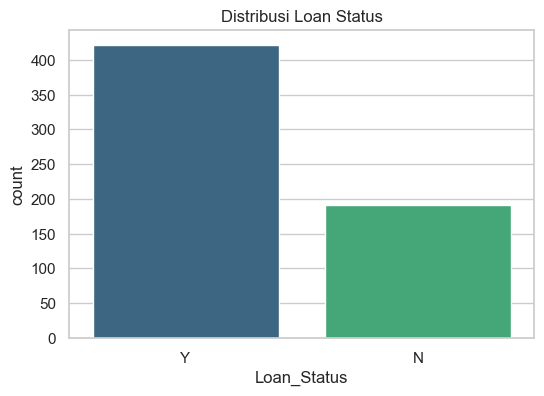

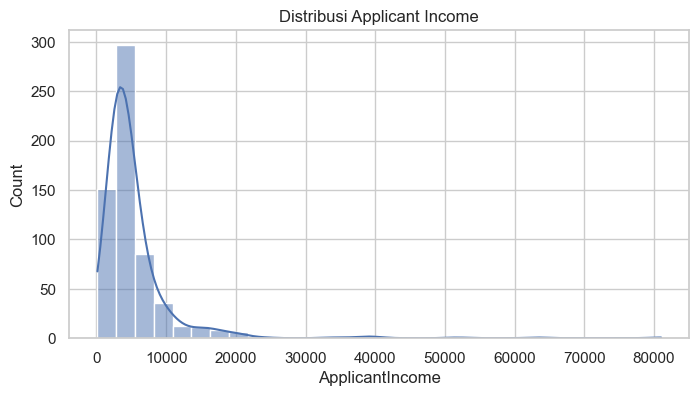

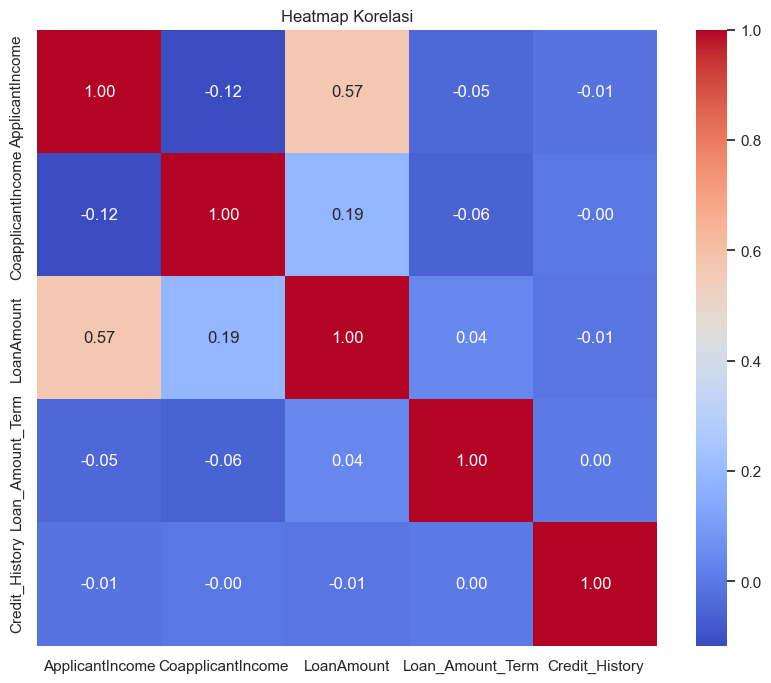

In [18]:
# 1. Cek Missing Values
print("Jumlah Missing Values per Kolom:")
print(df.isnull().sum())

# 2. Visualisasi Target Variable (Loan_Status)
plt.figure(figsize=(6, 4))
sns.countplot(x='Loan_Status', data=df, palette='viridis')
plt.title('Distribusi Loan Status')
plt.show()

# 3. Visualisasi Pendapatan (ApplicantIncome)
plt.figure(figsize=(8, 4))
sns.histplot(df['ApplicantIncome'], kde=True, bins=30)
plt.title('Distribusi Applicant Income')
plt.show()

# 4. Korelasi Antar Fitur Numerik
plt.figure(figsize=(10, 8))
# Hanya ambil kolom angka
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [19]:
# --- STEP 1: Handling Missing Values ---
# Buat copy agar data asli aman
df_clean = df.copy()

# Mengisi Kategori kosong dengan Modus
categorical_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']
for col in categorical_cols:
    if col in df_clean.columns:
        df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)

# Mengisi Angka kosong dengan Median
numerical_cols_na = ['LoanAmount', 'Loan_Amount_Term']
for col in numerical_cols_na:
    if col in df_clean.columns:
        df_clean[col].fillna(df_clean[col].median(), inplace=True)

# --- STEP 2: Cleaning Data Spesifik ---
# Buang kolom ID
if 'Loan_ID' in df_clean.columns:
    df_clean.drop('Loan_ID', axis=1, inplace=True)

# Perbaiki Dependents '3+' jadi '3'
if 'Dependents' in df_clean.columns:
    df_clean['Dependents'] = df_clean['Dependents'].replace('3+', '3')

# --- STEP 3: Encoding (Huruf ke Angka) ---
# Target (Loan_Status)
if 'Loan_Status' in df_clean.columns:
    le = LabelEncoder()
    df_clean['Loan_Status'] = le.fit_transform(df_clean['Loan_Status'])

# Fitur Lain (One-Hot Encoding)
df_encoded = pd.get_dummies(df_clean, drop_first=True)

# --- STEP 4: Scaling (Menyamakan Skala) ---
X = df_encoded.drop('Loan_Status', axis=1)
y = df_encoded['Loan_Status']

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

print("Preprocessing Selesai!")
print("Ukuran Data X:", X_scaled.shape)
print("Ukuran Data y:", y.shape)

# Tampilkan data bersih
display(X_scaled.head())

Preprocessing Selesai!
Ukuran Data X: (614, 14)
Ukuran Data y: (614,)


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0.072991,-0.554487,-0.211241,0.273231,0.411733,0.472343,-1.372089,-0.446339,-0.443713,-0.300975,-0.528362,-0.392601,-0.782016,1.428147
1,-0.134412,-0.038732,-0.211241,0.273231,0.411733,0.472343,0.728816,2.240448,-0.443713,-0.300975,-0.528362,-0.392601,-0.782016,-0.700208
2,-0.393747,-0.554487,-0.948996,0.273231,0.411733,0.472343,0.728816,-0.446339,-0.443713,-0.300975,-0.528362,2.547117,-0.782016,1.428147
3,-0.462062,0.251980,-0.306435,0.273231,0.411733,0.472343,0.728816,-0.446339,-0.443713,-0.300975,1.892641,-0.392601,-0.782016,1.428147
4,0.097728,-0.554487,-0.056551,0.273231,0.411733,0.472343,-1.372089,-0.446339,-0.443713,-0.300975,-0.528362,-0.392601,-0.782016,1.428147


File train.csv tidak ditemukan, pastikan path benar.
